In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset

In [86]:
data_df = pd.read_csv("./data.csv")

In [87]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


## Data Imputation (Missing Data Replacement)
Datasets often have missing values and this can cause problems for machine learning algorithms. It is considered good practise to indentify and replace missing values in each column of your dataset prior to performing predictive modelling. This method of missing data replacement is referred to as data imputation

In [88]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [89]:
for col in data_df.columns:
    missing_data = data_df[col].isna().sum() # đếm missing data
    missing_percent = missing_data / len(data_df)*100 # tính phần trăm
    print(f"Column {col}: has {missing_percent}% missing data")

Column Country: has 0.0% missing data
Column Age: has 10.0% missing data
Column Salary: has 10.0% missing data
Column Purchased: has 0.0% missing data


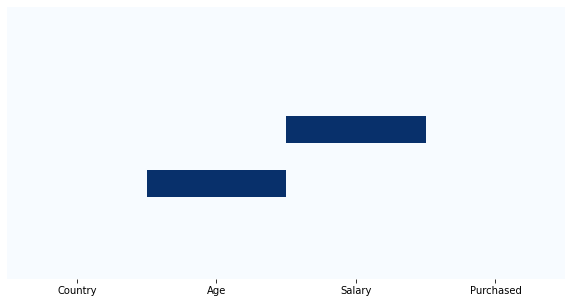

In [90]:
# trực quan để dễ nhìn
fig, ax = plt.subplots(figsize = (10,5))
sns.heatmap(data_df.isna(), cmap = "Blues", cbar = False, yticklabels = False);

In [91]:
# Tách dataset ra thành x và y
# x là các đặc trưng để đưa vào các mô hình máy học để train
# y là target để dự đoán 

In [92]:
# thường thì x để dưới dạng array, không để dạng df để kho có các labels
x = data_df.iloc[:, :-1].values 
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [93]:
y = data_df.iloc[:,-1].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [94]:
from sklearn.impute import SimpleImputer

#Creat an instance of Class SimpleImputer: np.nan is the empty vaalue in the dataset
imputer = SimpleImputer(missing_values=np.nan, strategy = "mean") # tìm các missing values và thay thế missing value bằng mean

imputer.fit(x[:, 1:3]) #thay thế các NaN trong x bằng mean
x[:, 1:3] = imputer.transform(x[:, 1:3]) # gán các giá trị mean lại vô các cột có missing values

In [95]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## Encode Categorical Data
Mã hóa các dữ liệu danh mục

### Encode Independent variable (X)
Mã hóa các cột dữ liệu độc lập ( cột biến X )

In [96]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#setup class instance
ct = ColumnTransformer(transformers = [("encoder", OneHotEncoder(), [0])], remainder = "passthrough")
x = ct.fit_transform(x)

In [97]:
x #. (France, Ger,  Spain, Age, Salary) nó chuyển thành vector

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

### Encode Dependent variable (Y)
Mã hóa các cột dữ liệu phụ thuộc ( cột biến Y )

In [98]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [99]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [100]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

## Spliting the dataset (X = data, y = output) into Training set and Test set

In [101]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 ) #80% để train và 20% để test
#80% dữ liệu của x, 20% dữ liệu của x, nhãn tương ứng vs từng x

In [102]:
x_train

array([[1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object)

In [103]:
y_train

array([1, 0, 1, 0, 1, 1, 0, 0])

In [104]:
x_test

array([[0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0]], dtype=object)

In [105]:
y_test

array([0, 1])

In [106]:
data_df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [107]:
# 2 cái feature age và salary chênh lệch nhau, sẽ tạo ra sự áp đảo cột salary bởi vì giá trị số học cột salary cao
# chuẩn hóa thành một thang tiêu chuẩn để ko có sự chênh lệch lớn
# để mô hình máy học ko có sự bias nào cho những feature có giá trị lớn hơn những feature còn lại

## Feature scaling
Co giãn dữ liệu

In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 3:] = sc.fit_transform(x_train[:, 3:])

In [109]:
x_train

array([[1.0, 0.0, 0.0, -0.7529426005471072, -0.6260377781240918],
       [1.0, 0.0, 0.0, 1.008453807952985, 1.0130429500553495],
       [1.0, 0.0, 0.0, 1.7912966561752484, 1.8325833141450703],
       [0.0, 1.0, 0.0, -1.7314961608249362, -1.0943465576039322],
       [1.0, 0.0, 0.0, -0.3615211764359756, 0.42765697570554906],
       [0.0, 1.0, 0.0, 0.22561095973072184, 0.05040823668012247],
       [0.0, 0.0, 1.0, -0.16581046438040975, -0.27480619351421154],
       [0.0, 0.0, 1.0, -0.013591021670525094, -1.3285009473438525]],
      dtype=object)

In [110]:
x_test[:, 3:] = sc.transform(x_test[:, 3:])

In [111]:
x_test

array([[0.0, 1.0, 0.0, 2.1827180802863797, 2.3008920936249107],
       [0.0, 0.0, 1.0, -2.3186282969916334, -1.7968097268236927]],
      dtype=object)